# Segment Data from the Calcbench API
## The data behind the [Calcbench Segments](https://www.calcbench.com/segments) page.

In [11]:
# %#pip install calcbench-api-client[Pandas] pandasgui nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 14.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.5 MB 10.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.2/1.5 MB 13.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/268.9 kB ? eta -:--:--
   --------------------------------------- 268.9/268.9 kB 17.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [72]:
import calcbench as cb
from pandasgui import show
import pandas as pd
from nltk.metrics import edit_distance

In [2]:
tickers = cb.tickers(index="DJIA")

In [3]:
d = cb.dimensional(
    company_identifiers=tickers,
    metrics=["GeographicalSegmentRevenue"],
    period_type="annual",
)

In [36]:
chart_values = d.loc[
    ("DIS", slice(None), slice(None), slice(None), ["Americas", "Europe"]), :
]

In [73]:
edit_distances = (
    chart_values.reset_index()
    .apply(lambda r: edit_distance(r["label"], r["standardized_label"]), axis=1)
    .rename("edit_distance")
)

In [80]:
edit_distances.index = chart_values.index

In [94]:
x = (
    chart_values.merge(edit_distances, right_index=True, left_index=True)
    .sort_values("edit_distance")
    .droplevel(["metric", "label"], axis=0)
)

In [106]:
no_dupes = x.loc[~x.index.duplicated()].sort_index()

<Axes: xlabel='ticker,fiscal_period'>

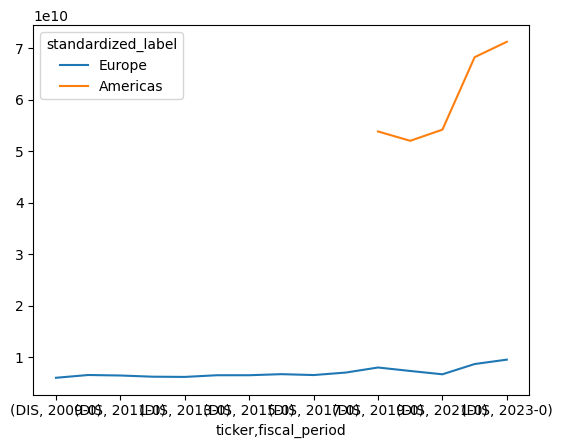

In [114]:
no_dupes.unstack("standardized_label")['value'].plot()